In [2]:
import pandas as pd

In [3]:
mots = pd.read_csv("ListeDeMots.txt", sep="\n")

In [4]:
mots.head()

,a
0,à
1,abaissa
2,abaissable
3,abaissables
4,abaissai


In [5]:
mots.shape

(336530, 1)

In [6]:
type(mots)

pandas.core.frame.DataFrame

In [7]:
type(mots.a)

pandas.core.series.Series

#### Compter les mots commencant par

In [8]:
# Compter les mots commencant par
mots.a.str.startswith("bac").value_counts()

False    336436
True         94
Name: a, dtype: int64

#### Compter les mots terminant par

In [9]:
# Compter les mots terminant par
mots.a.str.endswith("bourg").value_counts()

False    336527
True          3
Name: a, dtype: int64

#### Compter mots commencant par et se terminant par

In [10]:
cond = mots.a.str.startswith("m") & mots.a.str.endswith("s")

In [11]:
cond.value_counts()

False    329785
True       6745
Name: a, dtype: int64

In [12]:
type(cond)

pandas.core.series.Series

#### Afficher les mots commençant par

In [43]:
# Afficher les mots commençant par
LDM = []
for i in mots.a:
    if i.startswith("pyth"):
        LDM.append(i)
LDM

['pythagoricien',
 'pythagoricienne',
 'pythagoriciennes',
 'pythagoriciens',
 'pythagorique',
 'pythagoriques',
 'pythagorisme',
 'pythagorismes',
 'pythie',
 'pythien',
 'pythienne',
 'pythiennes',
 'pythiens',
 'pythies',
 'pythiques',
 'python',
 'pythonisse',
 'pythonisses',
 'pythons']

#### Afficher les mots terminant par

In [45]:
# Afficher les mots terminant par
LDM = []
for i in mots.a:
    if i.endswith("limer"):
        LDM.append(i)
LDM

['élimer', 'limer', 'sublimer']

#### Afficher les mots commencant par et se terminant par

In [15]:
# Afficher les mots commencant par et se terminant par
LDM = []
for i in mots.a:
    if i.startswith("or") & i.endswith("eur"):
        LDM.append(i)
LDM

['orateur',
 'orchestrateur',
 'ordinateur',
 'ordonnateur',
 'organisateur',
 'orientateur',
 'orienteur',
 'orpailleur']

#### Compter le nombre de mots à n lettres

In [16]:
LDM = []
for i in mots.a:
    if len(i) == 25:
        LDM.append(i)
LDM

['anticonstitutionnellement', 'oto-rhino-laryngologistes']

In [17]:
type(mots.a)

pandas.core.series.Series

#### Afficher des lignes aléatoirement

In [18]:
""" 
n : nombre de lignes à générer aléatoirement
random_state : germe, reproduit la même séquence si la valeur et le nombre de lignes 
du fichier restent inchangés. Supprimer ce paramètre renverra des données différentes à chaque
execution
mots.sample(n=5) # s'applique aussi sur le DataFrame entier mais renvoie dans ce cas un DataFrame 
et non une série
"""
rand = mots.a.sample(n=5, random_state=17) # Renvoie une série Pandas
rand

44028           carambolé
164894     germanisassiez
136014    entre-détruites
284841            ridasse
300348     soumissionniez
Name: a, dtype: object

## Visualisations

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

#### Graph 1

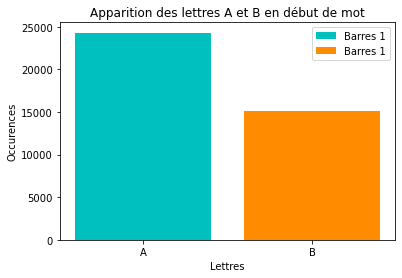

In [20]:
motsa = 0
motsb = 0

for i in mots.a:
    if i.startswith("a"):
        motsa += 1

for i in mots.a:
    if i.startswith("b"):
        motsb += 1

x = ["A"]
y = [motsa]

x2 = ["B"]
y2 = [motsb]

plt.bar(x, y, label="Barres 1", color='c')
plt.bar(x2, y2, label="Barres 1", color='darkorange')

plt.xlabel("Lettres")
plt.ylabel("Occurences")
plt.title("Apparition des lettres A et B en début de mot")
plt.legend()

### Graph 2

#### Nombre de lettres par mot

In [21]:
long = mots.a.str.len()

In [22]:
long = long.value_counts()
long

10    51402
9     49536
11    46557
8     40807
12    36775
7     27945
13    25619
6     15762
14    15649
15     8730
5      6812
16     4418
17     2120
4      2064
18      977
3       469
19      437
20      205
21       94
2        91
22       42
23       11
24        4
25        2
1         2
Name: a, dtype: int64

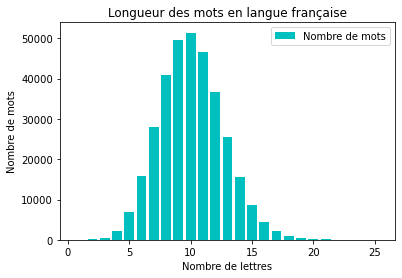

In [23]:
plt.bar(long.index, long, label="Nombre de mots", color='c')

plt.xlabel("Nombre de lettres")
plt.ylabel("Nombre de mots")
plt.title("Longueur des mots en langue française")
plt.legend()

#### Visualisation d'une distribution (mot commencant par)

In [24]:
import string

In [25]:
alpha = list(string.ascii_lowercase)
alphaList = []
occur = 0

In [26]:
for lettre in alpha:
    for i in mots.a:
        if i.startswith(lettre):
            occur += 1
    alphaList.append(occur)
    occur = 0

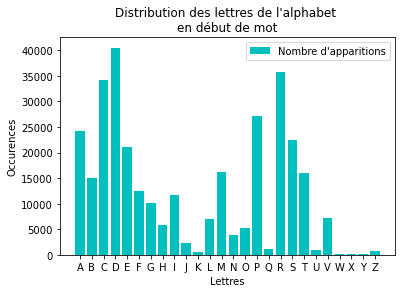

In [27]:
x = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", 
    "S", "T", "U", "V", "W", "X", "Y", "Z"]
y = alphaList

plt.bar(x, y, label="Nombre d'apparitions", color='c')

plt.xlabel("Lettres")
plt.ylabel("Occurences")
plt.title("Distribution des lettres de l'alphabet \nen début de mot")
plt.legend()

#### Visualisation d'une distribution (mots terminant par)

In [28]:
alphaList = []
occur = 0

In [29]:
for lettre in alpha:
    for i in mots.a:
        if i.endswith(lettre):
            occur += 1
    alphaList.append(occur)
    occur = 0

In [30]:
len(x)

26

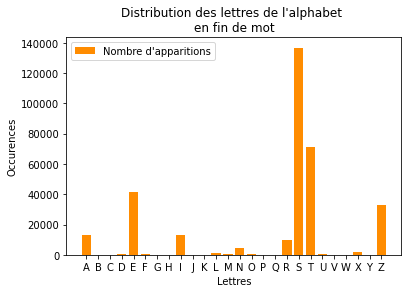

In [31]:
y = alphaList

plt.bar(x, y, label="Nombre d'apparitions", color='darkorange')

plt.xlabel("Lettres")
plt.ylabel("Occurences")
plt.title("Distribution des lettres de l'alphabet \nen fin de mot")
plt.legend()